In [45]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [46]:
df = pd.read_csv("./Leads.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [48]:
df.shape[0]

9240

In [49]:
df.isna().sum()/df.shape[0] * 100 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [50]:
df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [51]:
df.Country.fillna("India", inplace=True)

In [52]:
df.Specialization.describe()

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

In [53]:
df.loc[df.Specialization == "Select"]= "not sure yet"
df.Specialization.fillna("not sure yet", inplace= True)

In [54]:
df["How did you hear about X Education"].value_counts()
df.loc[df["How did you hear about X Education"] == "Select"]= "not mentioned by the lead"
df["How did you hear about X Education"].fillna("not mentioned by the lead", inplace= True)


In [55]:
null_df  = pd.DataFrame(df.isna().sum()/df.shape[0] * 100 )

In [56]:
# null_df

In [57]:
null_df  = pd.DataFrame(df.isna().sum()/df.shape[0] * 100 )
null_df[null_df[0]>0]

,0
Lead Source,0.021645
TotalVisits,0.086580
Page Views Per Visit,0.086580
What is your current occupation,28.971861
What matters most to you in choosing a course,29.177489
Tags,29.220779
Lead Quality,33.116883
Lead Profile,29.177489
City,15.346320
Asymmetrique Activity Index,20.638528


In [58]:
drp_col = ["What is your current occupation", "What matters most to you in choosing a course", "Tags", "Lead Quality", 'Lead Profile' ]

In [59]:
df.drop(columns=drp_col, inplace= True)

In [60]:
null_df  = pd.DataFrame(df.isna().sum()/df.shape[0] * 100 )
null_df[null_df[0]>0]

,0
Lead Source,0.021645
TotalVisits,0.086580
Page Views Per Visit,0.086580
City,15.346320
Asymmetrique Activity Index,20.638528
Asymmetrique Profile Index,20.638528
Asymmetrique Activity Score,20.638528
Asymmetrique Profile Score,20.638528


In [61]:
df["Lead Source"].fillna("not mentioned by the lead", inplace=True)

In [62]:
df = df[~(df["TotalVisits"].isna())]

In [63]:
df.City.value_counts()

City
not mentioned by the lead      3142
not sure yet                   1942
Mumbai                         1670
Thane & Outskirts               401
Other Cities                    276
Other Cities of Maharashtra     217
Other Metro Cities              138
Tier II Cities                   28
Select                            1
Name: count, dtype: int64

In [64]:
df.City.fillna("not mentioned by the lead", inplace=True)

In [65]:
df["Asymmetrique Activity Index"].fillna("not mentioned by the lead", inplace=True)

In [66]:
df["Asymmetrique Profile Index"].fillna('not mentioned by the lead', inplace=True)

In [67]:
df["Asymmetrique Activity Score"].fillna("not mentioned by the lead", inplace=True)

In [68]:
df["Asymmetrique Profile Score"].fillna("not mentioned by the lead", inplace=True)

In [69]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [70]:
df.Converted.value_counts()

Converted
not mentioned by the lead    3142
0                            3025
not sure yet                 1942
1                            1123
Name: count, dtype: int64

In [71]:
df.Converted = df.Converted.apply(lambda x: 0 if x!=1 else 1 )

In [72]:
df.Converted.value_counts()

Converted
0    8109
1    1123
Name: count, dtype: int64

In [73]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [74]:
y = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

In [75]:
# def col_checker(x):
#     try:
#         if x.lower() == "not mentioned by the lead" or x.lower() == "not sure yet" or x.lower() == "no":
#             return 0
#         if x.lower() == 'yes':
#             return 1
#     except:
#         return x

In [76]:
def check_numeric(col, edf):
    d = {}
    for j in col:
        cnt = 0
        for item in list(edf[j].values):
            try:
                int(item)
                cnt+=1
            except:
                continue
        d[j] = cnt
    return d


In [77]:
x = check_numeric(y, df)

In [78]:
df.shape

(9232, 32)

In [79]:
df["Page Views Per Visit"].value_counts()

Page Views Per Visit
not mentioned by the lead    3142
not sure yet                 1942
0.0                           815
2.0                           713
3.0                           620
                             ... 
3.2                             1
2.22                            1
6.71                            1
3.91                            1
2.83                            1
Name: count, Length: 83, dtype: int64

In [80]:
def get_the_unique_strings(edf, ad):
    l = []
    ab = {}
    col = [item for item in ad.keys() if x[item]>10]
    for j in col:
        cnt = 0
        for item in list(edf[j].values):
            try:
                int(item)
            except:
                l.append(item)
        ab[j] = set(l) 
    return ab
             

In [81]:
cd = get_the_unique_strings(df,x)
    

In [82]:
def parallal_col(x):
    print(x)
    return parallal_col

In [83]:
def converter(x):
    if x == "not mentioned by the lead" or x == "not sure yet":
        return 0
    else:
        return float(x)

In [84]:
col_to_convert =  list(cd.keys())

In [85]:
df.corr()

ValueError: could not convert string to float: 'not sure yet'

In [ ]:
for item in col_to_convert:
    df[item] = df[item].apply(converter)

<Axes: >

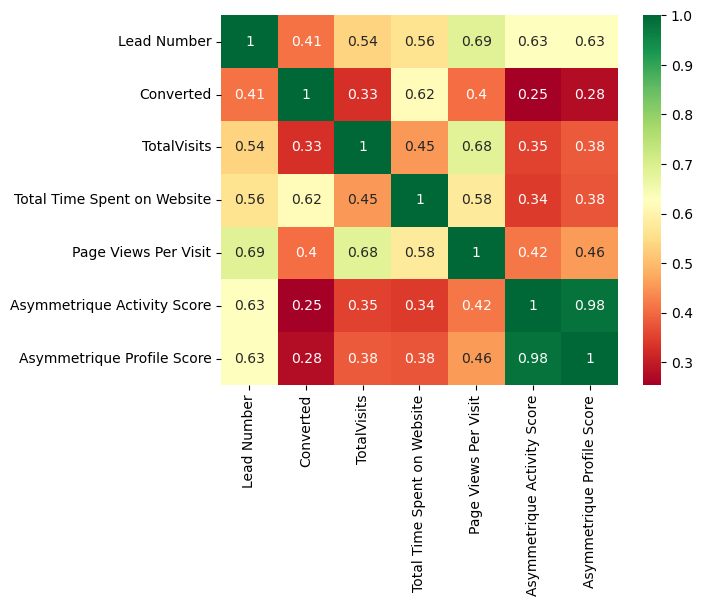

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [ ]:
def check_yes_no(df1, cols):
    z = []
    for col in cols:
        try:
            if "yes" in [item.lower() for item in list(df1[col].unique())] and "no" in [item.lower() for item in list(df1[col].unique())]:
                z.append(col)
            else:
                continue
        except:
            continue
    return z

In [ ]:
def check_not_mentioned(df1, cols):
    z = []
    for col in cols:
        try:
            if "not mentioned by the lead" in [item.lower() for item in list(df1[col].unique())]:
                z.append(col)
            else:
                continue
        except:
            continue
    return z

In [ ]:
l = check_yes_no(df, list(df.columns))

In [ ]:
l

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [ ]:
m = check_not_mentioned(df, list(df.columns))

In [ ]:
df["Search"].value_counts()

No                           4144
not mentioned by the lead    3142
not sure yet                 1942
Yes                             4
Name: Search, dtype: int64

In [ ]:
for item in l:
    df[item] = df[item].apply(lambda x: 1 if x.lower()== "yes" else 0)

In [ ]:
df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

In [ ]:
## Homework to fill this not_sure_yet with_proper information
m

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [ ]:
df["Lead Origin"] =  df["Lead Origin"].apply(lambda x: "no_lead_origin info" if x in ["not mentioned by the lead","not sure yet"] else x)

In [ ]:
# df["Lead Source"] = df["Lead Source"].apply(lambda x: )

In [ ]:
## Homework to fill this not_sure_yet with_proper information
# adasdad

In [ ]:
from tqdm import tqdm
y = ['Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']
y = [item for item in y if item not in list(cd.keys())]
y = [item for item in y if item not in l]
for col in tqdm(y):
    x = pd.get_dummies(df[col], drop_first= True)
    df = pd.concat([df,x], axis=1)
    df.drop(columns= col, inplace=True)




100%|██████████| 16/16 [00:00<00:00, 456.63it/s]


In [ ]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=80)

In [ ]:
y_train = df_train.pop("Converted")
y_test = df_test.pop("Converted")

In [ ]:
numerical_values = list(cd.keys())

In [ ]:
numerical_values = numerical_values[1:]

In [ ]:
scaler = MinMaxScaler()
df_train[numerical_values] = scaler.fit_transform(df_train[numerical_values])

In [ ]:
log_reg  = LogisticRegression()
rfe = RFE(estimator = log_reg, n_features_to_select = 20)
rfe = rfe.fit(df_train, y_train)

In [ ]:
all_columns_status = list(df_train.columns)

In [ ]:
columns_to_choose = [all_columns_status[item] for item in range(len(all_columns_status)) if list(rfe.support_)[item]==True]

In [ ]:
columns_to_choose

['Do Not Email',
 'Total Time Spent on Website',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'Lead Add Form',
 'no_lead_origin info',
 'Had a Phone Conversation',
 'Olark Chat Conversation',
 'not mentioned by the lead',
 'Saudi Arabia',
 'Services Excellence',
 'Email',
 'not mentioned by the lead',
 'not mentioned by the lead',
 'not mentioned by the lead',
 '03.Low',
 'not mentioned by the lead',
 'not mentioned by the lead',
 'SMS Sent',
 'Unreachable']

In [ ]:
X_train = df_train[columns_to_choose]
X_test = df_test[columns_to_choose]

In [ ]:
X_train

,Do Not Email,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Add Form,no_lead_origin info,Had a Phone Conversation,Had a Phone Conversation,Olark Chat Conversation,Olark Chat Conversation,...,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,SMS Sent,SMS Sent,Unreachable,Unreachable
6367,1,0.091644,0.000000,0.00,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6610,0,0.000000,0.000000,0.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8428,0,0.000000,0.944444,0.75,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
7238,0,0.477089,0.000000,0.00,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1706,0,0.000000,0.000000,0.00,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8722,0,0.000000,0.000000,0.00,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2266,0,0.000000,0.000000,0.00,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
2990,0,0.610961,0.000000,0.00,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
5316,1,0.035040,0.000000,0.00,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0


In [ ]:
X_train_sm = sm.add_constant(X_train)
log_reg_model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
log_reg_model = log_reg_model.fit()
log_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7385
Model:                            GLM   Df Residuals:                     7360
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 18 May 2024   Deviance:                       57012.
Time:                        19:41:31   Pearson chi2:                 2.79e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -5.516e+15   2.95e+07  -1.87e+08      0.000   -5.52e+15   -5.52e+15
Do Not Email                -7.232e+14   4.39e+06  -1.65e+08      0.000   -7.23e+14   -7.23e+14
Total Time Spent on Website  7.174e+14   5.61e+06   1.28e+08      0.000    7.17e+14    7.17e+14
Asymmetrique Activity Score      4e+15   2.64e+07   1.52e+08      0.000       4e+15       4e+15
Asymmetrique Profile Score   1.931e+15   2.16e+07   8.92e+07      0.000    1.93e+15    1.93e+15
Lead Add Form                4.762e+15   2.75e+07   1.73e+08      0.000    4.76e+15    4.76e+15
no_lead_origin info          9.698e+14   2.96e+07   3.28e+07      0.000     9.7e+14     9.7e+14
Had a Phone Conversation     1.082e+15   3.89e+07   2.79e+07      0.000    1.08e+15    1.08e+15
Had a Phone Conversation     3.436e+14   4.91e+07      7e+06      0.000    3.44e+14    3.44e+14
Olark Chat Conversation     -4.497e+14   4.45e+06  -1.01e+08      0.000    -4.5e+14    -4.5e+14
Olark Chat Conversation      3.642e+13   8.15e+06   4.47e+06      0.000    3.64e+13    3.64e+13
not mentioned by the lead    2.762e+26   1.04e+20   2.67e+06      0.000    2.76e+26    2.76e+26
not mentioned by the lead   -1.175e+23   4.64e+16  -2.53e+06      0.000   -1.17e+23   -1.17e+23
not mentioned by the lead    7.843e+22   2.94e+16   2.67e+06      0.000    7.84e+22    7.84e+22
not mentioned by the lead    1.489e+23   5.59e+16   2.66e+06      0.000    1.49e+23    1.49e+23
not mentioned by the lead    6.949e+24   9.75e+19   7.13e+04      0.000    6.95e+24    6.95e+24
not mentioned by the lead   -8.368e+22   3.14e+16  -2.67e+06      0.000   -8.37e+22   -8.37e+22
not mentioned by the lead    9.684e+22   3.64e+16   2.66e+06      0.000    9.68e+22    9.68e+22
not mentioned by the lead    4.707e+22   1.77e+16   2.67e+06      0.000    4.71e+22    4.71e+22
not mentioned by the lead     4.21e+22   1.59e+16   2.65e+06      0.000    4.21e+22    4.21e+22
not mentioned by the lead   -2.295e+22    8.6e+15  -2.67e+06      0.000    -2.3e+22    -2.3e+22
not mentioned by the lead    2.179e+24   8.17e+17   2.67e+06      0.000    2.18e+24    2.18e+24
not mentioned by the lead   -1.112e+23   4.17e+16  -2.67e+06      0.000   -1.11e+23   -1.11e+23
not mentioned by the lead   -3.583e+22   1.35e+16  -2.66e+06      0.000   -3.58e+22   -3.58e+22
not mentioned by the lead   -5.509e+22   2.07e+16  -2.67e+06      0.000   -5.51e+22   -5.51e+22
not mentioned by the lead    -2.63e+21   9.93e+14  -2.65e+06      0.000   -2.63e+21   -2.63e+21
Saudi Arabia                 -4.51e+15   3.01e+07   -1.5e+08      0.000   -4.51e+15   -4.51e+15
Services Excellence         -6.886e+14   1.97e+07   -3.5e+07      0.000   -6.89e+14   -6.89e+14
Email                        1.481e+15   1.59e+07    9.3e+07      0.000    1.48e+15    1.48e+15
not mention

In [ ]:
# Using Decision tree



In [ ]:
X_test

,Do Not Email,Total Time Spent on Website,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Add Form,no_lead_origin info,Had a Phone Conversation,Had a Phone Conversation,Olark Chat Conversation,Olark Chat Conversation,...,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,not mentioned by the lead,SMS Sent,SMS Sent,Unreachable,Unreachable
8282,0,1316.0,14.0,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3693,0,0.0,0.0,0.0,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
740,0,139.0,14.0,17.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5163,0,0.0,0.0,0.0,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
7218,0,0.0,0.0,0.0,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,0,363.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2295,0,322.0,13.0,18.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,0,0.0,0.0,0.0,0,1,0,0,0,0,...,1,1,1,1,1,1,0,0,0,0
7084,0,461.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [ ]:
clf_model = model.fit(X_train, y_train)

In [ ]:
y_test_pred = clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[1426,  180],
       [ 121,  120]])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
accuracy_score(y_test, y_test_pred)

0.8370330265295073

In [ ]:
precision_score(y_test, y_test_pred)

0.4

In [ ]:
recall_score(y_test, y_test_pred)

0.4979253112033195